# (covid-19-world-cases-deaths-testing)
## by (Junko Omata)

## Preliminary Wrangling

>Data used; covid10 world cases from GitHub AwesomeData

> I live in a small ski town called Yuzawa in Niigata perfecture in Japan, 1.25 hours from Tokyo with bullet train where we have large number of older people

> Covid19 could have obliterated our town, wiping out older generation especially as we used to have lots of inbound tourist from China until upto outbreak in 2020 January
> Train accessibility suited day trip ski tourism and for specially those tourist, not interested in skiing or snow activity but wanted to take trendy selfie photos in white snow... we used to have bus/train load of people arriving every hour and older people run hotels, inns, pensionnette, restaurants and bars were regularly exposed to outside people

> However, apart from unfortunate few people infected by Tokyo seasonal workers... not many people were infected and left us baffled and terrified, wanted to know what is making infections worse spread in the world
(to this date, Yuzawa town people been Covid19 positive are 23, outsiders working/staying in the town been 37, totalling 60 people --- our town population is currently 7,964 full vaccination rate is 86.8% )


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading datasets from Github Awesome data for COVID19 case numbers
> Everyone is aware of the case numbers on TV, news, internet, etc. and very keen to find out 
> Would like to see if what I already know from media is any different from what I see from this datasets

In [2]:
df_covid =pd.read_csv('covid-19-world-cases-deaths-testing.csv')

In [3]:
df_covid['location'].value_counts()
df_covid.query('location == "Peru"')
# Peru has most data entries, may be not surprising
df_covid.info()
df_covid['ndate'] = pd.to_datetime(df_covid['date'])
df_thisyear = df_covid.query('ndate >= "2021-01-01"')
df_thisyear.to_csv('./Downloads/df_thisyear.csv', encoding='utf-8-sig')
#observing the data, checking through excel sheets view
df_thisyear[['location', 'new_cases_per_million', 'total_deaths_per_million', 'total_cases_per_million']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121017 entries, 0 to 121016
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121017 non-null  object 
 1   continent                                115502 non-null  object 
 2   location                                 121017 non-null  object 
 3   date                                     121017 non-null  object 
 4   total_cases                              114912 non-null  float64
 5   new_cases                                114909 non-null  float64
 6   new_cases_smoothed                       113894 non-null  float64
 7   total_deaths                             104123 non-null  float64
 8   new_deaths                               104278 non-null  float64
 9   new_deaths_smoothed                      113894 non-null  float64
 10  total_cases_per_million         

,location,new_cases_per_million,total_deaths_per_million,total_cases_per_million
312,Afghanistan,4.594,55.252,1318.249
313,Afghanistan,1.833,55.503,1320.081
314,Afghanistan,3.088,55.754,1323.169
315,Afghanistan,5.021,55.980,1328.190
316,Afghanistan,2.561,56.156,1330.750
...,...,...,...,...
121012,Zimbabwe,14.113,305.854,8645.873
121013,Zimbabwe,22.197,306.318,8668.070
121014,Zimbabwe,13.782,306.384,8681.852
121015,Zimbabwe,4.373,306.450,8686.225


### covid-19-world-cases-deaths-testing Data Structure

> daily records of no of covid19 cases by location

### Main feature is daily record of new_cases, total_cases and deaths, with test numbers

> new_cases_per_million daily changes and people_fully_vaccinated_per_hundred, hopefully showing the trend to decrease the number of new cases


### To investigate which variant would affect new_cases numbers, I would like to see relationship with people_fully_vaccinated_per_hundred

> people_fully_vaccinated_per_hundred is effectively percentage value

> Intresting to see the relationship of new_cases_per_million vs total_deaths_per_million

> Also intresting to see any of the below sociological and medical variables have any affect on new_cases numbers, population_density, median_age, gdp_capital, hospital_beds_per_thousand, cardiovasc_death_rate, diabetes_prevalance, 

> Not in this datasets, however, though linked with heart disease and diabetes... it would be intresting to see if oral hygine data, e.g. toothpaste sales or toothbrushing numbers/day may be having relationships with 
(I have checked on WHO for density_of_dentistry_per_1000, however this data was not up to date to match COVID data)

## Univariate Exploration -- what is going on world wide?

First checking on new_cases_per_million for this year and last year

Is there any seasonal trend?

Is it currently going down in new cases?

How is vaccination coverage doing world-wide?

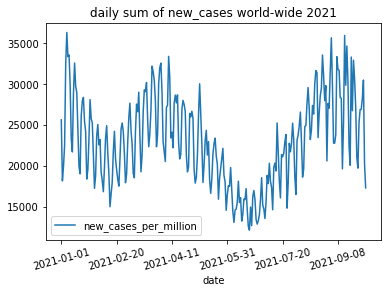

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '2021-08-14'),
  Text(0.0, 0, '2021-01-01'),
  Text(50.0, 0, '2021-02-20'),
  Text(100.0, 0, '2021-04-11'),
  Text(150.0, 0, '2021-05-31'),
  Text(200.0, 0, '2021-07-20'),
  Text(250.0, 0, '2021-09-08'),
  Text(300.0, 0, '')])

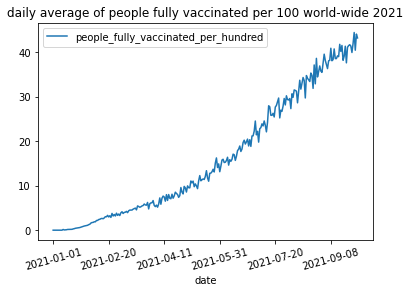

In [4]:
df_bydate=df_thisyear.groupby('date')[['date','new_cases_per_million']].sum()
df_bydate.plot(kind='line')
plt.title('daily sum of new_cases world-wide 2021')
plt.xticks(rotation = 15)

plt.show()
df_bydate_vac = df_thisyear.groupby('date')[['date','people_fully_vaccinated_per_hundred']].mean()
df_bydate_vac = df_bydate_vac[:-1] 
df_bydate_vac
df_bydate_vac.plot(kind='line')
plt.title('daily average of people fully vaccinated per 100 world-wide 2021')
plt.xticks(rotation = 15)

This is daily sum of new_cases sumed across all 'locations' in the data, showing world-trend of the new cases for 2021, now I am curious, if this is any similar to previous year

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '2020-11-12'),
  Text(0.0, 0, '2020-01-01'),
  Text(50.0, 0, '2020-02-20'),
  Text(100.0, 0, '2020-04-10'),
  Text(150.0, 0, '2020-05-30'),
  Text(200.0, 0, '2020-07-19'),
  Text(250.0, 0, '2020-09-07'),
  Text(300.0, 0, '2020-10-27'),
  Text(350.0, 0, '2020-12-16'),
  Text(400.0, 0, '')])

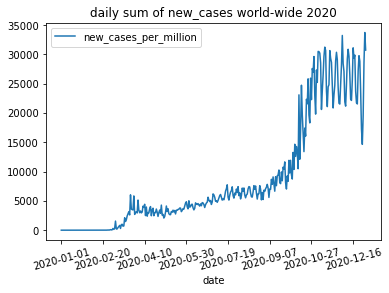

In [5]:
df_covid['year'] = df_covid['date'].apply(lambda x: x[:4])
df_lastyear = df_covid[df_covid.year == '2020']
df_lbydate = df_lastyear.groupby('date')[['date', 'new_cases_per_million']].sum()
df_lbydate.plot(kind='line')
plt.title('daily sum of new_cases world-wide 2020')
plt.xticks(rotation = 15)

There are no similar seasonal patterns observed world-wide, instead, steady climb to explosion during 2020

Also it is noticable, sometime around 2020 summer looks like Delta variant exploded and new_case number increased double and over

For these graphs,  instead of grouping by country, summed up by dates to show the new_case numbers across world

Wanted to show the new_case number changing through time, separated by year 2020 and 2021, therefore, I have limited numbers of the data by the year

## Bivariate Exploration - lets check on new_cases_per_million

Text(0.5, 1.0, 'new cases and total cases per million year 2020')

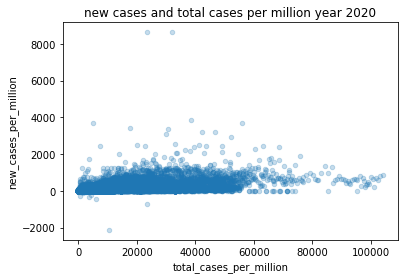

In [6]:
df_lastyear.plot(kind='scatter', x='total_cases_per_million', y='new_cases_per_million',alpha=0.25)

plt.title('new cases and total cases per million year 2020')


Text(0.5, 1.0, 'new cases and people fully vaccinated per 100 year 2020')

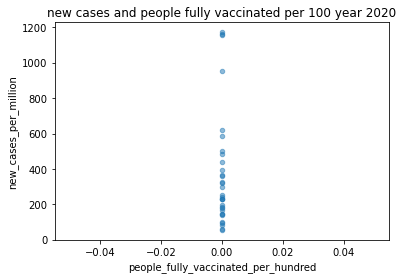

In [7]:
df_lastyear[df_lastyear['people_fully_vaccinated_per_hundred'].notna()]['people_fully_vaccinated_per_hundred']
df_lastyear.plot(kind='scatter', y='new_cases_per_million', x='people_fully_vaccinated_per_hundred',alpha=0.5)
plt.title('new cases and people fully vaccinated per 100 year 2020')

# no one was fully vaccinated last year!





Please note no-one was fully vaccinated in this data, therefore no orange bar is visible

In [8]:
#just to check on those daily changes of minus data -- example
df_lastyear.query('new_cases < 0')['new_cases_per_million']
df_lastyear.loc[20:30][['location','total_cases','new_cases','new_cases_per_million']]

,location,total_cases,new_cases,new_cases_per_million
20,Afghanistan,20.0,6.0,0.151
21,Afghanistan,25.0,5.0,0.126
22,Afghanistan,26.0,1.0,0.025
23,Afghanistan,26.0,0.0,0.000
24,Afghanistan,26.0,0.0,0.000
25,Afghanistan,24.0,-2.0,-0.050
26,Afghanistan,24.0,0.0,0.000
27,Afghanistan,34.0,10.0,0.251
28,Afghanistan,40.0,6.0,0.151
29,Afghanistan,42.0,2.0,0.050


new_cases are daily change of the total_cases (previous day of total_cases - current day of total_cases)
So! the minuses are good data ! ;)

Text(0.5, 1.0, 'new cases and total cases per million year 2021')

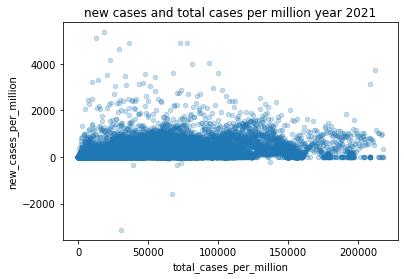

In [9]:
#in comparison ... this year
df_thisyear.plot(kind='scatter',y='new_cases_per_million', x='total_cases_per_million', alpha=0.25)
plt.title('new cases and total cases per million year 2021')


### A lot dernser data in 2021

Comparing 2020 and 2021 data, most of the new_cases are under 2000 for both however, for this year, there are so much dense infection patch under 2000, also there are outliers spreading to upwards even beyond 4000

Total_cases thinned out above 6000 in last years data, though for this year, it is sold chunk of cases up to 15000
This shows more volume of cases in daily new as well as accumulated total

For these graph, I cannot see clear relation between new_cases_per_million and total_cases_per_million

There are cases of total_cases number changes daily with new_cases being minus or, people get better or worse, died and dissapeared off data grid


### next checking on new_cases_per_million and people_fully_vaccinated_per_hundred

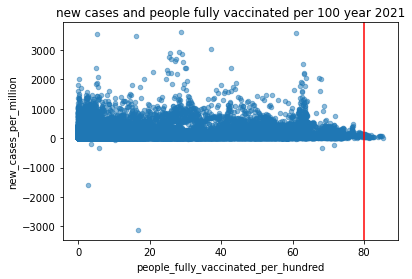

In [11]:
df_thisyear.plot(kind='scatter',y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5)
plt.title('new cases and people fully vaccinated per 100 year 2021')
plt.axvline(x=80, color='red')



### new_cases_per_million vs people_fully_vaccinated_per_hundred ***

fully vaccination rate goes up new cases generally goes down... apart from some outlier flare ups

Note above 80/100 vaccination rate, is is celar that new cases are suppressed low


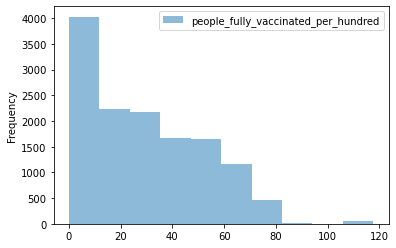

In [12]:
df_thisyear[df_thisyear.ndate>='2021-06-01'][['date','people_fully_vaccinated_per_hundred']].plot(kind='hist', alpha=0.5)
df_fvc21 = df_thisyear[df_thisyear.ndate>='2021-06-01'][['location','date','people_fully_vaccinated_per_hundred']]

Above 80/100 fully vaccinated, seems to dramatically supressing new_cases... worth closer look
There are over 100 people per hundred been vaccinated 
This could be 3rd shots recorded?

In [13]:
#booster 3rd shots? or error?
df_fvc21.query('people_fully_vaccinated_per_hundred > 100')
df_covid.query('people_fully_vaccinated_per_hundred > 100')[['date','location','people_fully_vaccinated_per_hundred', 'total_boosters']]

,date,location,people_fully_vaccinated_per_hundred,total_boosters
43025,2021-05-04,Gibraltar,101.75,NaN
43026,2021-05-05,Gibraltar,102.95,NaN
43027,2021-05-06,Gibraltar,103.95,NaN
43028,2021-05-07,Gibraltar,105.46,NaN
43034,2021-05-13,Gibraltar,105.54,NaN
43039,2021-05-18,Gibraltar,107.62,NaN
43040,2021-05-19,Gibraltar,109.85,NaN
43043,2021-05-22,Gibraltar,110.41,NaN
43048,2021-05-27,Gibraltar,111.83,NaN
43049,2021-05-28,Gibraltar,113.30,NaN


### close-up around 80/100 vaccine cover

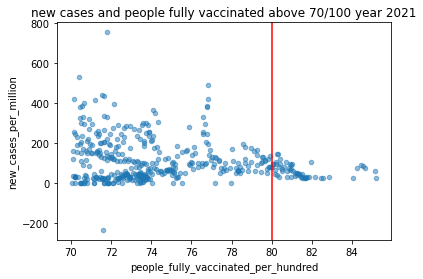

In [14]:
df_thisyear[df_thisyear.people_fully_vaccinated_per_hundred >= 70].plot(kind='scatter',y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5)
plt.title('new cases and people fully vaccinated above 70/100 year 2021')
plt.axvline(x=80, color='red')

Closed up look around 80/100 fully vaccinated
above 70, new_cases are suppressed under 800/day, above 80, under 200/day

### even closer, limiting the data to 1st September 2021 to 3rd October 2021

Text(0.5, 1.0, 'new cases and people fully vaccinated above 70/100 - "close-up" from Sep21-Oct21')

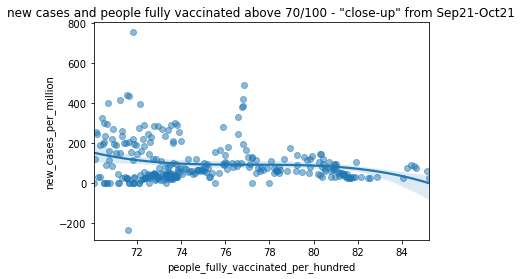

In [15]:
#more close-up data .. from 2021 September to 3rd October
#df_thisyear[df_thisyear.ndate >= '2021-09-01'].query('people_fully_vaccinated_per_hundred >=70').plot(kind='scatter', y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', alpha=0.5)
sb.regplot(data = df_thisyear[df_thisyear.ndate >= '2021-09-01'].query('people_fully_vaccinated_per_hundred >=70'), y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', scatter_kws={'alpha':0.5}, fit_reg = True, order=3);
plt.title('new cases and people fully vaccinated above 70/100 - "close-up" from Sep21-Oct21')

# fewer data than above 2021 whole year, though mostly concentrated in this 2 month.. meaning full vaccination achieved quite recently

More close up and seems like new_cases are going down... :)

### Whoa 80/100 above, who are they? have they succeeded to suppress COVID?

In [16]:
df_above80=df_thisyear[df_thisyear.people_fully_vaccinated_per_hundred >= 80][['date','location','people_fully_vaccinated_per_hundred','new_cases_per_million','total_deaths_per_million']].dropna()
df_above80.groupby('location').mean()
#curious to see if any difference observed between Malta and Portugal, shares geographical locations, culture, etc. and being so different in their outcomes


,people_fully_vaccinated_per_hundred,new_cases_per_million,total_deaths_per_million
location,,,
Iceland,80.380000,81.547000,96.109000
Malta,80.873125,70.022906,871.065125
Portugal,83.674000,67.280300,1762.060900
United Arab Emirates,81.455385,31.890077,208.809154


In [17]:
#highest 20 countries
print(df_thisyear.groupby('location')[['location', 'people_fully_vaccinated_per_hundred','new_cases_per_million', 'total_deaths_per_million']].mean().sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(20))

#quite surprisingly, lots of islanders are highly vaccinated - small communities may be faster to act on emergencies
#fillna(0) is deliberately not used to not to 'dilute' by unentered data counts by mean() calculation


                          people_fully_vaccinated_per_hundred  \
location                                                        
Gibraltar                                           80.185227   
Pitcairn                                            80.143333   
United Arab Emirates                                71.197639   
China                                               65.986667   
Jersey                                              53.360870   
Cayman Islands                                      52.687262   
Israel                                              49.993897   
Aruba                                               49.608776   
Falkland Islands                                    49.490000   
San Marino                                          48.625976   
Nauru                                               48.412000   
Anguilla                                            48.134211   
Qatar                                               47.958400   
Mongolia                 

### 80% above but struggling

San Marino's total_deaths_per_milion is high despite of vaccination rate is high

Portual and Malta are not in this top20 list, meaning both of them had reached 80% quite recently, above 80% data being anormally

In [18]:

df_malta21 = df_thisyear[df_thisyear.weekly_hosp_admissions.notna()].query('location == "Malta"')
df_portugal21 = df_thisyear[df_thisyear.weekly_hosp_admissions.notna()].query('location == "Portugal"')
df_mapo = df_malta21.append(df_portugal21)

df_mapo.groupby('location')[['new_cases_per_million', 'total_cases_per_million', 'total_deaths_per_million','weekly_hosp_admissions_per_million', 'hospital_beds_per_thousand']].mean()



,new_cases_per_million,total_cases_per_million,total_deaths_per_million,weekly_hosp_admissions_per_million,hospital_beds_per_thousand
location,,,,,
Malta,156.46800,55440.314000,741.130308,40.412641,4.485
Portugal,209.11159,83570.797667,1574.372897,20.184744,3.390


### all the courageous works of doctors and nurses... 

weekly_hosp_admissions_per_million is much higher in Malta than Portual

twice the hospital admissions halved total death numbers!!
 I did not bother put this into graph presentation since, weekly_hosp_admission_per_million were only available for these 2 countries

In [19]:
df_mapo.groupby('location')[['new_cases_per_million', 'total_cases_per_million', 'positive_rate','aged_65_older', 'diabetes_prevalence']].mean()

,new_cases_per_million,total_cases_per_million,positive_rate,aged_65_older,diabetes_prevalence
location,,,,,
Malta,156.46800,55440.314000,0.028128,19.426,8.83
Portugal,209.11159,83570.797667,0.049949,21.502,9.85


### some gets lucky

Comparing aged_65_older figure, Malta's population is younger and diabetes_prevalence is lower, those also helps with total outcome

In [20]:
print(df_thisyear.query('location == "Portugal"')[['people_fully_vaccinated_per_hundred','new_cases_per_million', 'total_deaths_per_million']].mean())
print(df_thisyear.query('location == "Malta"')[['people_fully_vaccinated_per_hundred','new_cases_per_million', 'total_deaths_per_million']].mean())

df_high20=df_thisyear.groupby('location')[['location', 'people_fully_vaccinated_per_hundred','new_cases_per_million', 'total_deaths_per_million']].mean().sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

#Portual = 50th, Malta=21st on ranking
print(df_high20.index.get_loc('Portugal'))
print(df_high20.index.get_loc('Malta'))


people_fully_vaccinated_per_hundred      27.085630
new_cases_per_million                   234.267522
total_deaths_per_million               1580.367406
dtype: float64
people_fully_vaccinated_per_hundred     40.954187
new_cases_per_million                  171.969127
total_deaths_per_million               744.073036
dtype: float64
50
21


In [21]:
# real vaccination rate without 100+ entries for Gibraltar

df_thisyear[df_thisyear.people_fully_vaccinated_per_hundred < 100].query('location == "Gibraltar"')['people_fully_vaccinated_per_hundred'].mean()

53.11040540540541

### Full Vaccination rate goes up, new cases goes down

new_cases_per_million and people_fully_vaccinated_per_hundred has corelationships of being negative, this is quite apparent with the case of vaccination percentage goes up to 80 and beyond

### Islanders are doing better on vaccination

 There are few cases for Gibraltar, having people_fully_vaccinated_per_hundred being more than hundred
 
 Also found out there are lots of islands and smaller nations which have higher mean full vaccination coverage
 
Curious case is Malta and Portugal, geographical near and shares linguistic, cultural similarities having above 80 of fully vaccinated, and having different outcome ---> from this data set, it could be related to weekly_hosp_admission_per_million, median_age, and diabetic_prevalence

## Multivariate Exploration -- more investigation

In [22]:
# to put some figure listed into perspective setting up few new columns

df_thisyear.total_deaths_per_million.describe()
bin_edges=[36.24, 238.50, 1002.80, 6000]
bin_names=['very low', 'low', 'high']
df_thisyear['impact'] = pd.cut(df_thisyear['total_deaths_per_million'], bin_edges, labels = bin_names)
df_thisyear['impact'].value_counts()

df_thisyear.diabetes_prevalence.describe()
be_diabetes = [5.31, 7.20, 10.43,35.00]
bn_diabetes = ['low','moderate', 'high']
df_thisyear['diabetic_level'] = pd.cut(df_thisyear['diabetes_prevalence'], be_diabetes, labels = bn_diabetes)
df_thisyear['diabetic_level'].value_counts()

df_thisyear.aged_65_older.describe()
be_65plus = [3.46, 6.22, 13.93, 28]
bn_65plus = ['younger', 'moderate-mixed', 'older']
df_thisyear['older_population'] = pd.cut(df_thisyear['aged_65_older'], be_65plus, labels=bn_65plus)
df_thisyear['older_population'].value_counts()

df_thisyear.cardiovasc_death_rate.describe()
be_cardio = [171.29, 243.96, 333.43, 724.42]
bn_cardio = ['low', 'moderate', 'high']
df_thisyear['cardio_death_no'] = pd.cut(df_thisyear['cardiovasc_death_rate'], be_cardio, labels=bn_cardio)

df_thisyear.male_smokers.describe()
be_smokers = [21.60, 33.10, 41.30, 80.00]
bn_smokers = ['low', 'moderate', 'high']
df_thisyear['smokers-men']=pd.cut(df_thisyear['male_smokers'], be_smokers, labels=bn_smokers)

df_thisyear['month'] = df_thisyear['date'].apply(lambda x: x.__str__()[5:7])


<ipython-input-22-af03e9aec313>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thisyear['impact'] = pd.cut(df_thisyear['total_deaths_per_million'], bin_edges, labels = bin_names)
<ipython-input-22-af03e9aec313>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thisyear['diabetic_level'] = pd.cut(df_thisyear['diabetes_prevalence'], be_diabetes, labels = bn_diabetes)
<ipython-input-22-af03e9aec313>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

Text(0.5, 1.0, 'new_cases_per_million vs people_fully_vaccinated_per_hundred by death toll impact')

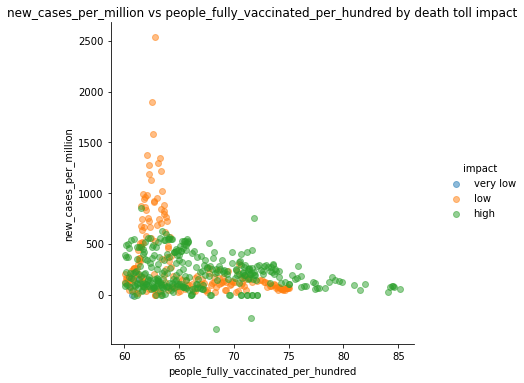

In [23]:
df_new = df_thisyear[df_thisyear.icu_patients.notna()].query('people_fully_vaccinated_per_hundred > 60')
g = sb.lmplot(data = df_new, y='new_cases_per_million', x='people_fully_vaccinated_per_hundred',fit_reg = False, hue = 'impact', scatter_kws={'alpha':0.5})
plt.title('new_cases_per_million vs people_fully_vaccinated_per_hundred by death toll impact')

### Vaccine works!

impact = death toll impact

Looks like all well suppressed of new_cases above 60/100

Text(0.5, 1.0, 'new_cases_per_million vs people_fully_vaccinated_per_hundred by diabetic_level')

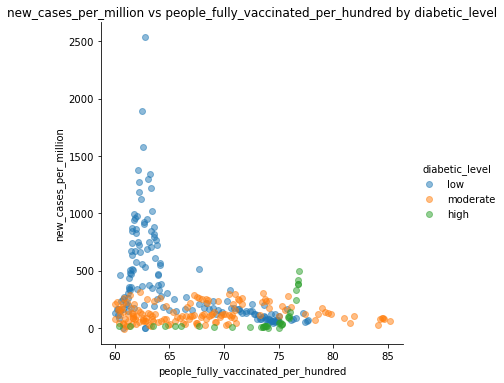

In [24]:
plt.show()
g = sb.lmplot(data=df_new, y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', hue='diabetic_level', fit_reg = False, scatter_kws={'alpha':0.5})
plt.title('new_cases_per_million vs people_fully_vaccinated_per_hundred by diabetic_level')

### or...  Ooops ! green curve

...theres a strange upward surge around 76/100 for diabetic level = high

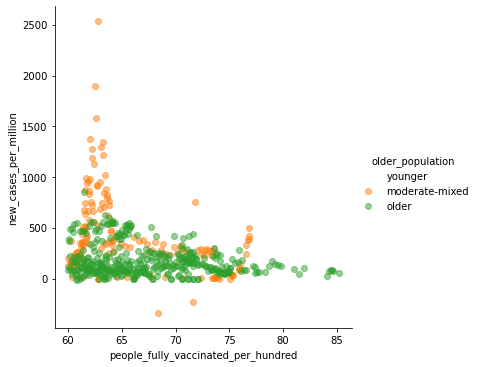

In [25]:
# in comparison
plt.show()
g = sb.lmplot(data=df_new, y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', hue='older_population', fit_reg = False, scatter_kws={'alpha':0.5})

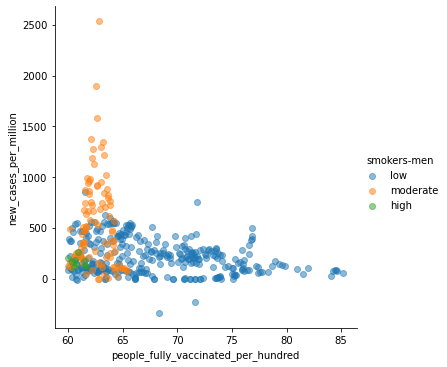

In [26]:
plt.show()
g = sb.lmplot(data=df_new, y='new_cases_per_million', x='people_fully_vaccinated_per_hundred', hue='smokers-men', fit_reg = False, scatter_kws={'alpha':0.5})

### Upsurge of the new_cases --- diabetes_prevalence

diabetic_level high group is having upward trend... against other groups trending down

upsurge is due to diabetic=high, older_generation=moderate-mixed, smoker=low, therefore it is safe to say diabetic level is a factor strongly affecting new_cases upsurge

This means middle aged smokers with diabetes are more at risk... I am imagining .... like Boris Johnson ??

Around 76/100 fully vaccinated, clear upsurge in green observed, needing more investigation

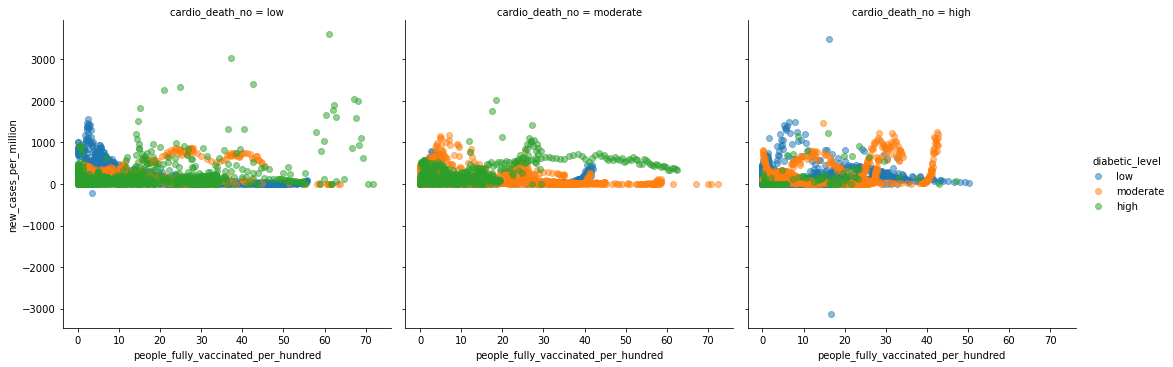

In [28]:
df_cardio = df_thisyear[['new_cases_per_million','people_fully_vaccinated_per_hundred','diabetic_level','older_population','cardio_death_no']].dropna()
plt.show()
g = sb.lmplot(data = df_cardio, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million',hue='diabetic_level', col='cardio_death_no', fit_reg=False, scatter_kws={'alpha':0.5})

### and... there is more.... OOps orange curves

76/100 upsurge is at right end of cardio=low presentation however, more concerned on new orange curves on cardio=high

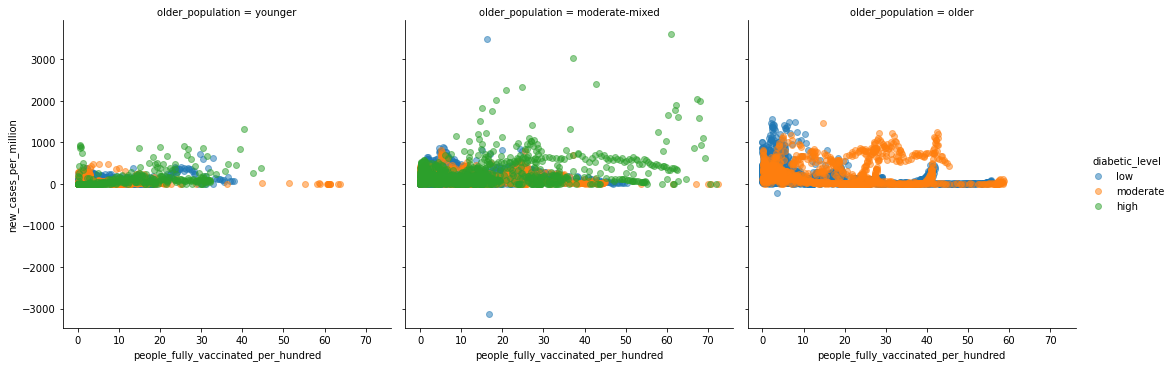

In [29]:
plt.show()
g = sb.lmplot(data = df_cardio, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million',hue='diabetic_level', col='older_population', fit_reg=False, scatter_kws={'alpha':0.5})

### Diabetic Level and cardio mortality level combo -- new trend at 30/100 and 40/100 ***

this combo is showing few curious upward surges strongly than 70/100 upsurge

This trend group is having cardio-high/diabetic-moderate combination

cardio-high/diabetic-moderate combination have few upsurge trends in orange curves going up

Also this combination is lower in vaccine level, below 60 comare to other groups being 80 and above

## Diabetic Level and age level combo ***

### upsurge in orange
 
could this be adverse effect of vaccine or new variant's emerging ? 

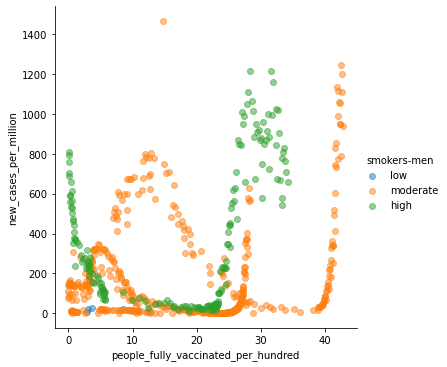

In [30]:
#close up of the curious combination of cardio-high/diabetic-moderate
df_spikers= df_thisyear[df_thisyear.diabetic_level=="moderate"].query('cardio_death_no =="high"')
plt.show()

g = sb.lmplot(data = df_spikers, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million', hue = 'smokers-men', fit_reg=False, scatter_kws={'alpha':0.5})

### close-up to cardio-high/diabetic-moderate --- orange curves ***

Quad whammy of cardio, diabetes, older and smoking, affecting new_cases_per_million upsurge despite full vaccination numbers

These people are cardio=high, diabetes=moderate , age=older and smoking=moderate to High (lets forget low)


In [31]:
#checking on data what else is going on
df_spikers.columns
df_spikers.groupby('location')[['location', 'new_cases_per_million', 'total_deaths_per_million', 'gdp_per_capita', 'median_age','male_smokers', 'population_density', 'hospital_beds_per_thousand', 'life_expectancy']].mean()



,new_cases_per_million,total_deaths_per_million,gdp_per_capita,median_age,male_smokers,population_density,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Afghanistan,9.355620,102.775554,1803.987,18.6,NaN,54.422,0.500,64.83
Libya,125.777094,433.234330,17881.509,29.0,NaN,3.623,3.700,72.91
Montenegro,487.181199,2218.393862,16409.288,39.1,47.9,46.280,3.861,76.88
Pakistan,12.374986,83.907616,5034.708,23.5,36.7,255.573,0.600,67.27
Romania,120.009862,1458.232159,23313.199,43.0,37.1,85.129,6.892,76.05
Samoa,0.018101,NaN,6021.557,22.0,38.1,69.413,NaN,73.32
Serbia,331.767975,890.595322,14048.881,41.2,40.2,80.291,5.609,76.00
Uzbekistan,10.485181,22.524757,6253.104,28.2,24.7,76.134,4.000,71.72


### Triple ... and Quad whammy people

Studying curious trend group data ....

,total_deaths_per_million
location,
Libya,462.430933
Montenegro,2122.394444
Romania,1252.511588
Serbia,831.643005


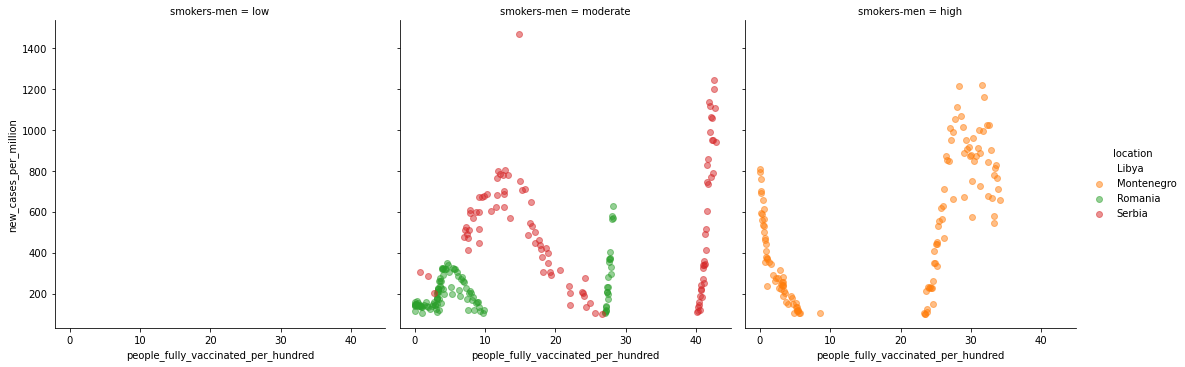

In [32]:
# even more close-up of upwards data more than 100 new cases....

df_nastyspike = df_spikers.query('new_cases_per_million > 100')

plt.show()
g = sb.lmplot(data = df_nastyspike, x='people_fully_vaccinated_per_hundred', y='new_cases_per_million', col='smokers-men', hue = 'location', fit_reg=False, scatter_kws={'alpha':0.5})
df_nastyspike[['location','total_deaths_per_million']].groupby('location').mean()


In [33]:
df_nastyspike.groupby('location')[['location','total_deaths_per_million', 'hospital_beds_per_thousand','tests_per_case','positive_rate','median_age' ,'life_expectancy','aged_65_older']].mean()

,total_deaths_per_million,hospital_beds_per_thousand,tests_per_case,positive_rate,median_age,life_expectancy,aged_65_older
location,,,,,,,
Libya,462.430933,3.700,NaN,NaN,29.0,72.91,4.424
Montenegro,2122.394444,3.861,NaN,NaN,39.1,76.88,14.762
Romania,1252.511588,6.892,9.062205,0.124142,43.0,76.05,17.850
Serbia,831.643005,5.609,5.572131,0.207481,41.2,76.00,17.366


<img src="./Screen Shot 2021-10-13 at 11.02.51.png">

In [34]:
# worst list, total outcome is bad.... here including Montenegro and Romania and noticablly lots of central European locations

df_thisyear.groupby('location')['total_deaths_per_million'].mean().describe()

df_thisyear.query('total_deaths_per_million > 500').groupby('location')[['location', 'cardiovasc_death_rate', 'male_smokers','diabetes_prevalence','total_deaths_per_million']].mean().sort_values(by='total_deaths_per_million', ascending=False)


,cardiovasc_death_rate,male_smokers,diabetes_prevalence,total_deaths_per_million
location,,,,
Peru,85.755,NaN,5.95,4869.579058
Hungary,278.296,34.8,7.55,2504.803337
San Marino,NaN,NaN,5.64,2455.267076
Czechia,227.485,38.3,6.82,2446.625036
Bosnia and Herzegovina,329.635,47.7,10.08,2423.321188
...,...,...,...,...
Kuwait,132.235,37.0,15.84,550.111123
Cape Verde,182.219,16.5,2.42,542.437750
Iraq,218.612,NaN,8.83,524.249243


What made Serbians total_death lower than Romania is not clear from the data

Could possibly be positive_rate, tests being more accurate and treated patient faster?

Surprisingly, those nastyspike people are not the worst on the list... 

### investigating on nasty spikes new_cases_per_million more than 100 

They are in the neighbourhood region of Romania, Serbia, Montenegro, Libya

Showing how close they are located, except Libya on the other side of the African continent

They share moderate to high cardio, diabetes and smoking habit

I wonder if these upward trend could be due to having new variants, adverse effect from vaccine or possibly manual workers/track drivers came home from EU ??

Afghanistan and Uzubekistan could be in the same situation but escaped by having younger population

For convenience I will call this region nastyspike region for this investigation

### Full Vaccination rate goes up, new_cases goes down except....

#### High Cardio mortality, moderate diabetic levels, older age, and smoking moderate - high

Generally there were negative co-relationship between people_fully_vaccinated_per_hundred and new_cases_per_million, showing vaccination rate goes up, new_cases goes down
however there were some interesting upsurge of new_cases for nastyspike region

### Quad whammy found!

Not only diabetic_prevalence, also cardiovasc_death_rate, age and smoker numbers strongly affected of jumping surge of new_cases to the point of being reverse trend despite vaccines
 
Reverse trend was localized to the geographycally close area of Romania, Serbia, Montenegro and Libya

For Reverse trend group, full vaccination rate remained around 40/100 to this date


Text(0.5, 1.0, 'nastyspike region new_cases_per_million/month change 2021')

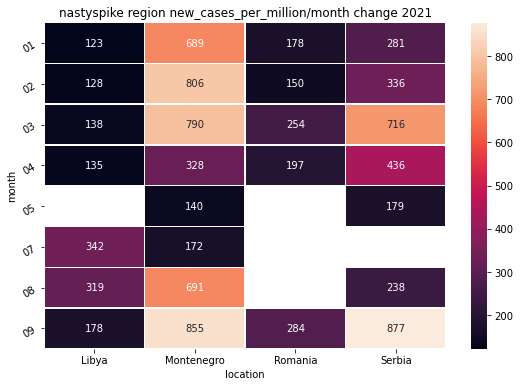

In [35]:

df_newmap = df_nastyspike.groupby(['location', 'month'])['new_cases_per_million'].mean()

df_newmap = df_newmap.reset_index()
df_newmap.new_cases_per_million.astype('int64')

newmap = df_newmap.pivot('month', 'location', 'new_cases_per_million')

#dropping october data as it only contains 3 days worth
newmap = newmap.iloc[0:-1]

f, ax = plt.subplots(figsize=(9, 6))
sb.heatmap(newmap, annot=True, fmt=".0f", linewidths=.5, ax=ax)
plt.yticks(rotation=30)
ax.set_title('nastyspike region new_cases_per_million/month change 2021')

### Upsurge is happening NOW !
Apart from missing big chanks of data for Romania.... seems constantly having rather high new_cases throughout year

Text(0.5, 1.0, 'nastyspike region new_deaths_per_million/month change 2021')

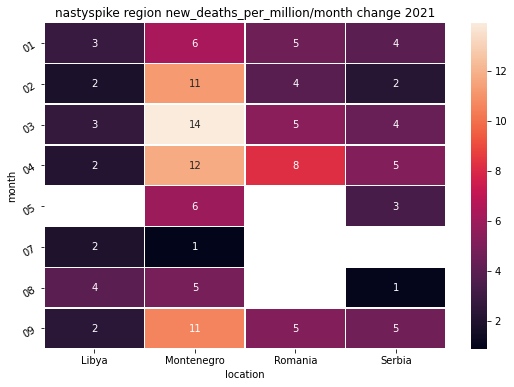

In [36]:

df_newmap2 = df_nastyspike.groupby(['location', 'month'])['new_deaths_per_million'].mean()

df_newmap2 = df_newmap2.reset_index()
df_newmap2.new_deaths_per_million.astype('int64')

newmap2 = df_newmap2.pivot('month', 'location', 'new_deaths_per_million')

#dropping october data as it only contains 3 days worth
newmap2 = newmap2.iloc[0:-1]

f, ax = plt.subplots(figsize=(9, 6))
sb.heatmap(newmap2, annot=True, fmt=".0f", linewidths=.5, ax=ax)
plt.yticks(rotation=30)
ax.set_title('nastyspike region new_deaths_per_million/month change 2021')

In [ ]:
jpyter nbconvert --to html exploration_covid19JO.ipynb